<a href="https://colab.research.google.com/github/mounisha123-ram/Multiple-Disease-Prediction/blob/main/Project4_Parkinsons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Parkinson’s Disease**

✅ What is Parkinson’s Disease?
Parkinson’s Disease (PD) is a progressive neurological disorder that affects movement. It happens when certain nerve cells in the brain, especially those that produce a chemical called dopamine, become damaged or die.


🧠 What does dopamine do?
Dopamine helps transmit signals in the brain that control smooth and coordinated muscle movements.

When dopamine levels drop (as in Parkinson’s), people start to show movement-related symptoms.

Common Symptoms of Parkinson’s Disease
Tremors – shaking hands, especially when at rest

Rigidity – stiffness in arms or legs

Bradykinesia – slow body movements

Balance problems – leading to falls

Voice changes – soft, shaky, or monotone voice

Writing changes – small or cramped handwriting (micrographia)

Important:-
Why use voice features to detect Parkinson's?
Parkinson's can affect the vocal cords, larynx, and respiratory system, which leads to:

Irregular pitch and loudness (jitter, shimmer)

Increased breathiness (higher NHR)

Slower, weaker, or monotone voice

So, voice analysis is a non-invasive and early detection method, which is why your dataset includes those vocal signal features.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import pickle
from google.colab import files

In [ ]:
df=pd.read_csv('/content/parkinsons - parkinsons.csv')
pd.set_option('display.max_columns', None)

In [ ]:
df.shape

(195, 24)

In [ ]:
df.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,0.190,0.01026,0.01161,0.01373,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [ ]:
df.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,0.190,0.01026,0.01161,0.01373,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [ ]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [ ]:
#drop the unnecessary column id
df.drop('name', axis=1, inplace=True)

In [ ]:
print(df['status'].unique())
print(df.shape)
print(df['status'].value_counts())

[1 0]
(195, 23)
status
1    147
0     48
Name: count, dtype: int64


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non-null    int64  
 1

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
#checking missing values
df.isnull().sum()

,0
MDVP:Fo(Hz),0
MDVP:Fhi(Hz),0
MDVP:Flo(Hz),0
MDVP:Jitter(%),0
MDVP:Jitter(Abs),0
MDVP:RAP,0
MDVP:PPQ,0
Jitter:DDP,0
MDVP:Shimmer,0
MDVP:Shimmer(dB),0


In [ ]:
#to see the total count of negative values in our datset
(df.select_dtypes(include='number') < 0).sum().sum()

np.int64(195)

In [ ]:
# Count negative values per numeric column
negative_counts = (df.select_dtypes(include='number') < 0).sum()

# Filter columns that actually have negative values
negative_counts = negative_counts[negative_counts > 0]

# Display the result
print(negative_counts)

spread1    195
dtype: int64


In [ ]:
#checking duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
df.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [ ]:
# Standardize column names
df.columns = df.columns.str.lower().str.replace('[^a-z0-9]', '_', regex=True)
df.columns

Index(['mdvp_fo_hz_', 'mdvp_fhi_hz_', 'mdvp_flo_hz_', 'mdvp_jitter___',
       'mdvp_jitter_abs_', 'mdvp_rap', 'mdvp_ppq', 'jitter_ddp',
       'mdvp_shimmer', 'mdvp_shimmer_db_', 'shimmer_apq3', 'shimmer_apq5',
       'mdvp_apq', 'shimmer_dda', 'nhr', 'hnr', 'status', 'rpde', 'dfa',
       'spread1', 'spread2', 'd2', 'ppe'],
      dtype='object')

# **column names explanation**


# **Voice Frequency Measures**
mdvp_fo_hz_	Average fundamental frequency of voice (in Hz). Lower or unstable in Parkinson’s.
mdvp_fhi_hz_	Maximum fundamental frequency (highest pitch).
mdvp_flo_hz_	Minimum fundamental frequency (lowest pitch).


Jitter Measures (Variation in frequency — voice instability)
Column	Explanation
mdvp_jitter___	Absolute jitter — short-term variations in pitch.
mdvp_jitter_abs_	Absolute value of frequency perturbation (in seconds).
mdvp_rap	Relative Average Perturbation — average variation between consecutive cycles.
mdvp_ppq	Five-point Period Perturbation Quotient — pitch variation over 5 cycles.
jitter_ddp	Average absolute difference of differences between cycles — essentially RAP × 3.


Shimmer Measures (Variation in amplitude — voice "shakiness")
Column	Explanation
mdvp_shimmer	Amplitude variation (shimmer).
mdvp_shimmer_db_	Shimmer in decibels (dB) — loudness instability.
shimmer_apq3	3-point Amplitude Perturbation Quotient.
shimmer_apq5	5-point Amplitude Perturbation Quotient.
mdvp_apq	Average perturbation quotient — general shimmer measure.
shimmer_dda	Average absolute difference of differences in amplitude — similar to APQ3 × 3.


Noise-to-Harmonics Measures
Column	Explanation
nhr	Noise-to-Harmonics Ratio — higher values indicate more noise (a Parkinson’s indicator).
hnr	Harmonics-to-Noise Ratio — higher values mean cleaner, more stable voice.

Nonlinear Dynamics
Column	Explanation
rpde	Recurrence Period Density Entropy — measures voice complexity.
dfa	Detrended Fluctuation Analysis — detects presence of long-term correlations in the voice.

Other Nonlinear Measures
Column	Explanation
spread1	Nonlinear measure of signal — reflects pitch variation.
spread2	Another spread measure — related to signal dynamics.
d2	Correlation dimension — complexity of voice signal.
ppe	Pitch Period Entropy — variation in pitch. Higher in Parkinson’s patients.

Target Variable
Column	Explanation
status	Diagnosis class: 1 = Parkinson’s disease, 0 = healthy control.


# **EDA**

In [ ]:
df.dtypes

,0
mdvp_fo_hz_,float64
mdvp_fhi_hz_,float64
mdvp_flo_hz_,float64
mdvp_jitter___,float64
mdvp_jitter_abs_,float64
mdvp_rap,float64
mdvp_ppq,float64
jitter_ddp,float64
mdvp_shimmer,float64
mdvp_shimmer_db_,float64


In [ ]:
# ✅ Outlier Detection and Distribution using Plotly Box Plots


# ✅ Explicit list of your dataset's numerical columns (as you shared)
numerical_cols = [
    'mdvp_fo_hz_', 'mdvp_fhi_hz_', 'mdvp_flo_hz_', 'mdvp_jitter___',
    'mdvp_jitter_abs_', 'mdvp_rap', 'mdvp_ppq', 'jitter_ddp',
    'mdvp_shimmer', 'mdvp_shimmer_db_', 'shimmer_apq3', 'shimmer_apq5',
    'mdvp_apq', 'shimmer_dda', 'nhr', 'hnr', 'rpde', 'dfa',
    'spread1', 'spread2', 'd2', 'ppe'
]

# Plot Box Plots for Each Feature
for col in numerical_cols:
    fig = px.box(df, y=col, title=f' Box Plot of {col}', points="all", template="plotly_white")
    fig.update_layout(
        yaxis_title=col,
        title_x=0.5,
        title_font=dict(size=18),
        yaxis=dict(showgrid=True)
    )
    fig.show()

In [ ]:
#Histograms for numeric features
numerical_cols = [
    'mdvp_fo_hz_', 'mdvp_fhi_hz_', 'mdvp_flo_hz_', 'mdvp_jitter___',
    'mdvp_jitter_abs_', 'mdvp_rap', 'mdvp_ppq', 'jitter_ddp',
    'mdvp_shimmer', 'mdvp_shimmer_db_', 'shimmer_apq3', 'shimmer_apq5',
    'mdvp_apq', 'shimmer_dda', 'nhr', 'hnr', 'rpde', 'dfa',
    'spread1', 'spread2', 'd2', 'ppe'
]

for col in numerical_cols:
    fig = px.histogram(
        df,
        x=col,
        title=f'📊 Histogram of {col}',
        marginal="rug",  # adds rug plot to show distribution
        nbins=30,
        template="plotly_white",
        opacity=0.75
    )
    fig.update_layout(
        xaxis_title=col,
        title_x=0.5,
        title_font=dict(size=18)
    )
    fig.show()

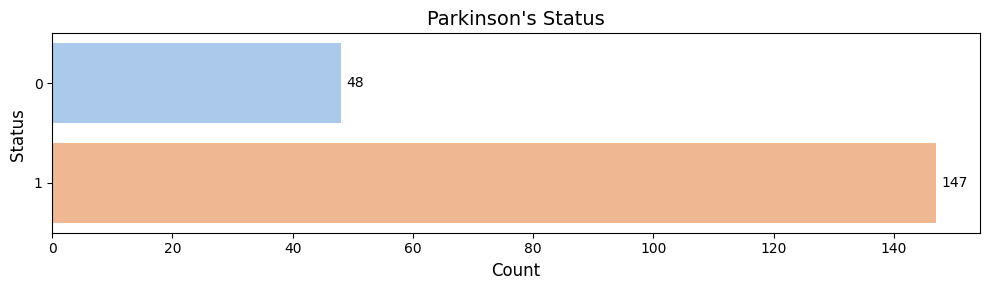

In [ ]:
#eda for target column
plt.figure(figsize=(10, 3))
ax = sns.countplot(y='status', data=df, palette='pastel')


plt.title("Parkinson's Status", fontsize=14)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Status ", fontsize=12)

for p in ax.patches:
    count = int(p.get_width())
    ax.text(p.get_width() + 1, p.get_y() + p.get_height() / 2, count, va='center', fontsize=10)

plt.tight_layout()
plt.show()

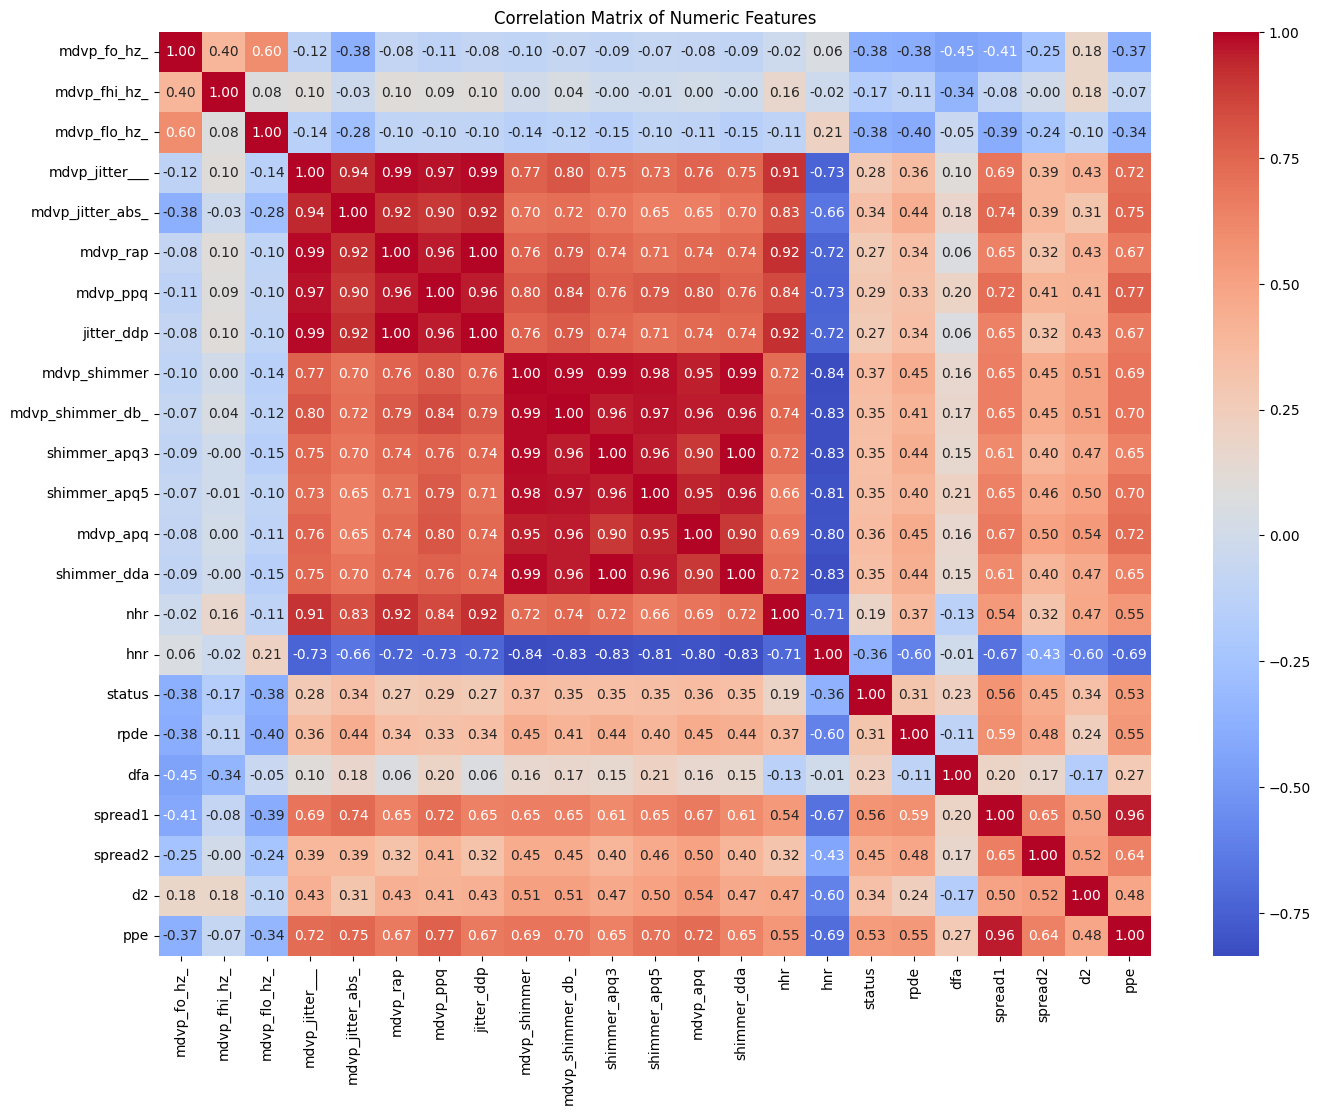

In [ ]:
# Calculate correlation matrix only for numeric columns
corr_matrix = df.select_dtypes(include=['int64', 'float64']).corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

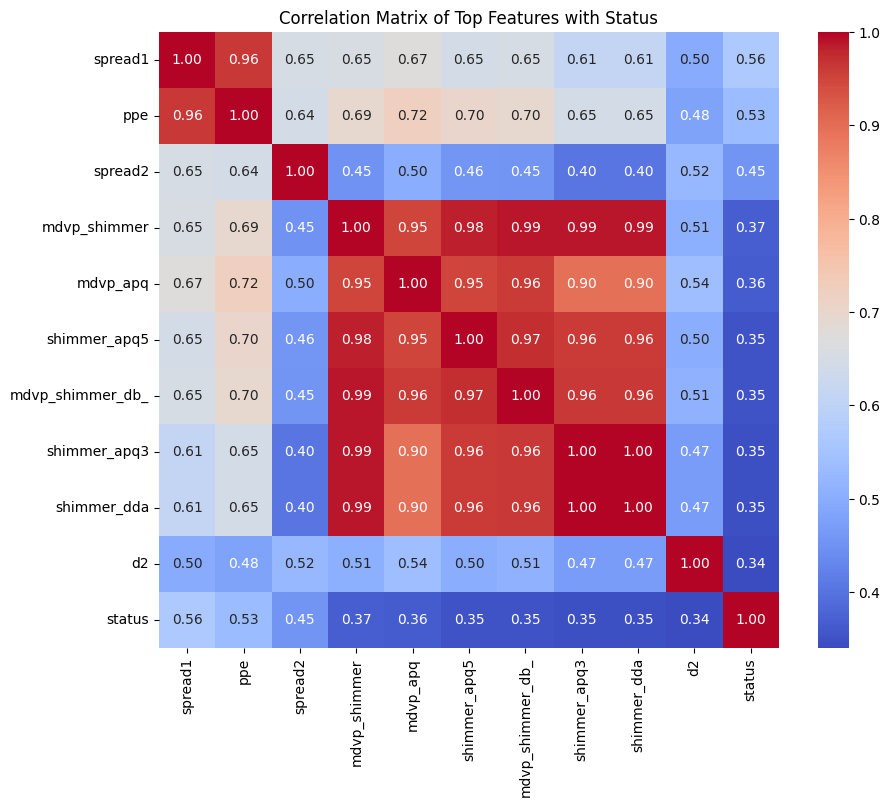

In [ ]:
# Calculate correlation with the target variable 'status'
target_corr = corr_matrix['status'].sort_values(ascending=False)

top_features = target_corr.head(11).index.tolist()

# Remove 'status' from the list if it's there
if 'status' in top_features:
    top_features.remove('status')

# Ensure we have at most 10 features (in case 'status' wasn't in the initial head(11))
top_features = top_features[:10]

# Add 'status' back to the list for the smaller correlation matrix calculation
top_features_with_status = top_features + ['status']


# Smaller correlation matrix
small_corr_matrix = df[top_features_with_status].corr()

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(small_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Top Features with Status')
plt.show()

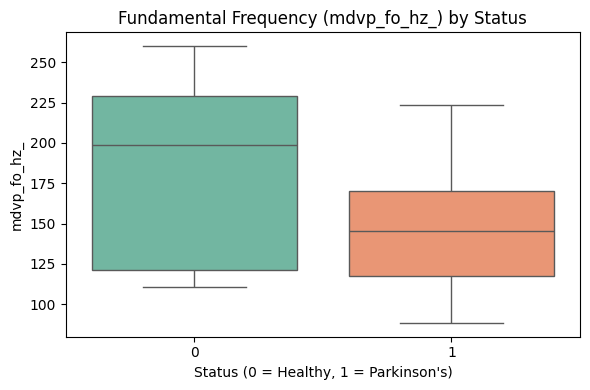

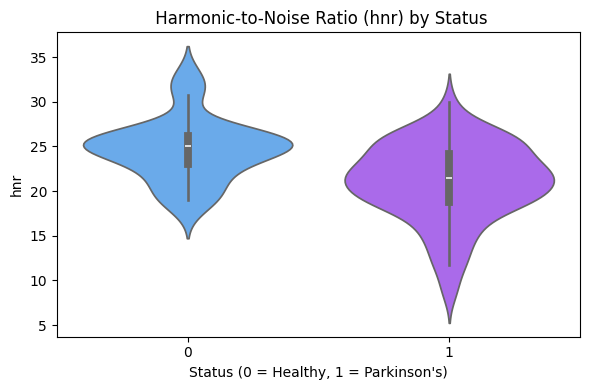

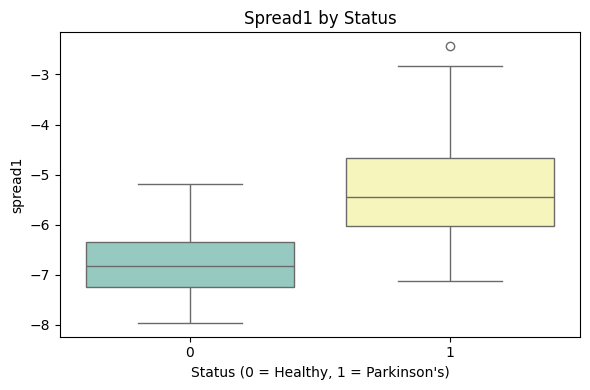

In [ ]:
#mdvp_fo_hz_ vs status (Boxplot)

plt.figure(figsize=(6, 4))
sns.boxplot(x='status', y='mdvp_fo_hz_', data=df, palette='Set2')
plt.title("Fundamental Frequency (mdvp_fo_hz_) by Status")
plt.xlabel("Status (0 = Healthy, 1 = Parkinson's)")
plt.ylabel("mdvp_fo_hz_")
plt.tight_layout()
plt.show()

#hnr vs status (Violin plot)

plt.figure(figsize=(6, 4))
sns.violinplot(x='status', y='hnr', data=df, palette='cool')
plt.title(" Harmonic-to-Noise Ratio (hnr) by Status")
plt.xlabel("Status (0 = Healthy, 1 = Parkinson's)")
plt.ylabel("hnr")
plt.tight_layout()
plt.show()

#spread1 vs status

plt.figure(figsize=(6, 4))
sns.boxplot(x='status', y='spread1', data=df, palette='Set3')
plt.title("Spread1 by Status")
plt.xlabel("Status (0 = Healthy, 1 = Parkinson's)")
plt.ylabel("spread1")
plt.tight_layout()
plt.show()

In [ ]:
df['status'].value_counts()

,count
status,
1,147
0,48


In [ ]:
#download cleaned csv file
from google.colab import files

# Save the cleaned DataFrame to a CSV file
df.to_csv('cleaned_parkinsons_data.csv', index=False)

# Download the file
files.download('cleaned_parkinsons_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.dtypes

,0
mdvp_fo_hz_,float64
mdvp_fhi_hz_,float64
mdvp_flo_hz_,float64
mdvp_jitter___,float64
mdvp_jitter_abs_,float64
mdvp_rap,float64
mdvp_ppq,float64
jitter_ddp,float64
mdvp_shimmer,float64
mdvp_shimmer_db_,float64


In [ ]:
df.columns

Index(['mdvp_fo_hz_', 'mdvp_fhi_hz_', 'mdvp_flo_hz_', 'mdvp_jitter___',
       'mdvp_jitter_abs_', 'mdvp_rap', 'mdvp_ppq', 'jitter_ddp',
       'mdvp_shimmer', 'mdvp_shimmer_db_', 'shimmer_apq3', 'shimmer_apq5',
       'mdvp_apq', 'shimmer_dda', 'nhr', 'hnr', 'status', 'rpde', 'dfa',
       'spread1', 'spread2', 'd2', 'ppe'],
      dtype='object')

# **ml model**

In [ ]:
# 1. Features and target
X = df.drop('status', axis=1)
y = df['status']

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# 3. SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 4. Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# 5. Train RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train_smote)

# 6. Evaluate
y_pred = rf_model.predict(X_test_scaled)
print("📋 Classification Report:\n", classification_report(y_test, y_pred))
print(f"✅ Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.96      0.90      0.93        29

    accuracy                           0.90        39
   macro avg       0.86      0.90      0.87        39
weighted avg       0.91      0.90      0.90        39

✅ Accuracy: 89.74%


In [ ]:
clf = RandomForestClassifier(random_state=42)

# 2. Perform 5-fold cross-validation on the full dataset (before train-test split or SMOTE)
cv_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')

# 3. Print results
print(f"✅ Cross-validation accuracy scores: {cv_scores}")
print(f"📊 Mean CV accuracy: {cv_scores.mean() * 100:.2f}%")
print(f"📉 Standard Deviation: {cv_scores.std():.2f}")

✅ Cross-validation accuracy scores: [0.76923077 0.82051282 0.82051282 0.76923077 0.74358974]
📊 Mean CV accuracy: 78.46%
📉 Standard Deviation: 0.03


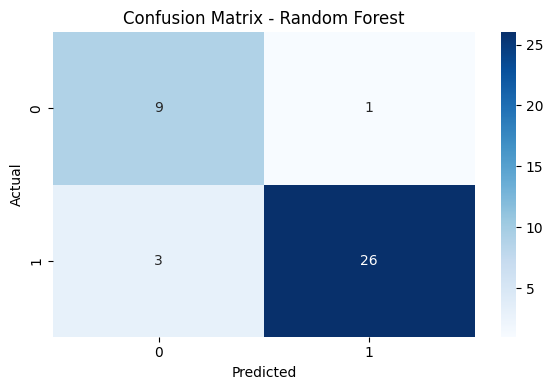

📈 ROC AUC Score: 0.9845


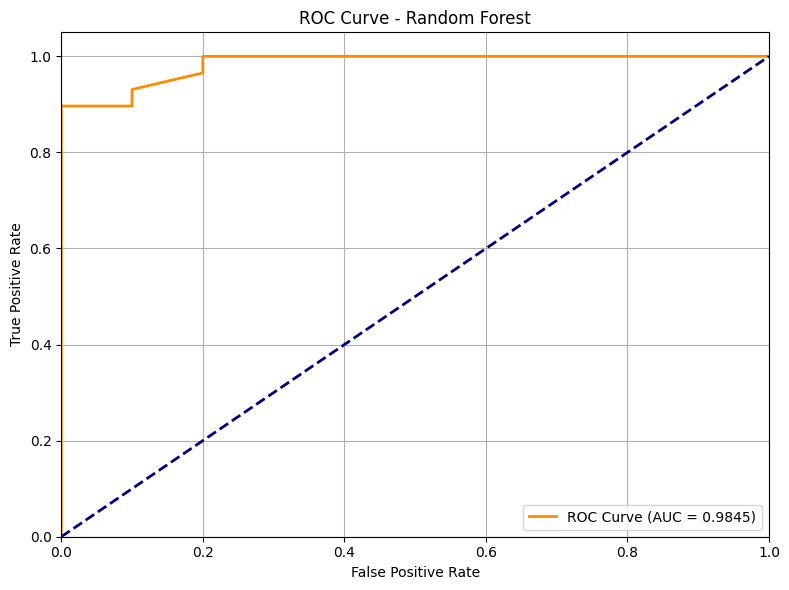

In [ ]:
# --- 📊 Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.tight_layout()
plt.show()

# --- 📈 ROC AUC Score ---
# Predict probabilities
y_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

# Calculate AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"📈 ROC AUC Score: {roc_auc:.4f}")

# ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# 7. Save model and scaler
with open("parkinsons_rf_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)

with open("parkinsons_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

files.download('parkinsons_rf_model.pkl')
files.download('parkinsons_scaler.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save scaled test data
pd.DataFrame(X_test_scaled).to_csv("X_test_parkinsons_scaled.csv", index=False)

# Save test labels
pd.DataFrame(y_test, columns=['status']).to_csv("y_parkinsons_test.csv", index=False)

#files.download('X_test_parkinsons_scaled.csv')
files.download('y_parkinsons_test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Top Feature Importances:
             Feature  Importance
18           spread1    0.132649
21               ppe    0.110184
7         jitter_ddp    0.073676
12          mdvp_apq    0.067058
8       mdvp_shimmer    0.061498
11      shimmer_apq5    0.056253
5           mdvp_rap    0.054579
1       mdvp_fhi_hz_    0.042673
14               nhr    0.040865
10      shimmer_apq3    0.036449
19           spread2    0.035669
0        mdvp_fo_hz_    0.034434
13       shimmer_dda    0.032420
20                d2    0.032174
2       mdvp_flo_hz_    0.031707
3     mdvp_jitter___    0.028767
9   mdvp_shimmer_db_    0.027210
4   mdvp_jitter_abs_    0.026566
16              rpde    0.022909
17               dfa    0.021602
6           mdvp_ppq    0.017299
15               hnr    0.013360


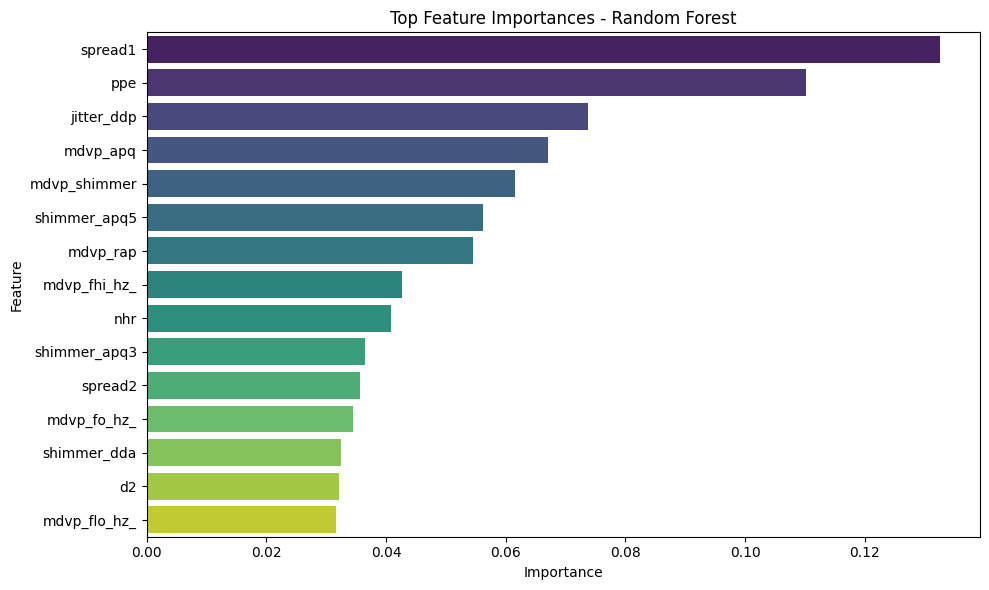

In [ ]:
# Feature Importance
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importance
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print top important features
print("Top Feature Importances:")
print(feat_imp_df.head(22))

# Plot top  feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(15), palette='viridis')
plt.title('Top Feature Importances - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()